In [1]:
import pandas as pd
import numpy as np

# Lire le CSV

df = pd.read_csv('data/Cinturao_10ans_daily_1km.csv')

# Convertir la colonne 'date' en datetime
df['datetime'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Trier le DataFrame par date (optionnel)
df = df.sort_values('datetime').reset_index(drop=True)

# Sélectionner uniquement les colonnes utiles
cols = ['datetime', 'NDVI', 'EVI', 'NDWI', 'NDMI', 'B2','B3','B4','B8','B11']
df = df[cols]

# Afficher le résultat
df.head()

,datetime,NDVI,EVI,NDWI,NDMI,B2,B3,B4,B8,B11
0,2015-08-01,0.359750,1.521640,-0.369013,0.045058,1410.131222,1673.443439,1716.000000,3632.723982,3339.484163
1,2015-08-11,0.345443,1.333934,-0.365236,0.029969,1423.920993,1706.891648,1793.146727,3672.336343,3477.772009
2,2015-08-11,0.330016,1.205282,-0.358636,0.026876,1421.978723,1716.403812,1838.774379,3648.094858,3472.268174
3,2016-03-17,0.434600,1.896934,-0.411182,0.124986,1316.083803,1622.348001,1535.479972,3903.301898,3040.169450
4,2016-03-17,0.392689,1.257416,-0.364022,0.108979,1313.335187,1596.178566,1494.794072,3596.109067,2869.494791


# Description des colonnes du CSV exporté depuis Google Earth Engine

Le CSV contient les valeurs des indices agricoles et des bandes spectrales pour chaque carré de 1 km² et chaque date. Voici la signification de chaque colonne :

| Colonne       | Description |
|---------------|-------------|
| `system:index`| Identifiant unique de l'image Sentinel-2 pour cette date et scène. Format : `YYYYMMDDTHHMMSS_...`. |
| `B2`          | Bande 2 de Sentinel-2 (Blue, 490 nm), valeurs de réflectance en surface. |
| `B3`          | Bande 3 de Sentinel-2 (Green, 560 nm), valeurs de réflectance en surface. |
| `B4`          | Bande 4 de Sentinel-2 (Red, 665 nm), valeurs de réflectance en surface. |
| `B8`          | Bande 8 de Sentinel-2 (NIR, 842 nm), valeurs de réflectance en surface. |
| `B11`         | Bande 11 de Sentinel-2 (SWIR1, 1610 nm), valeurs de réflectance en surface. |
| `NDVI`        | Normalized Difference Vegetation Index : `(NIR - RED) / (NIR + RED)` <br> Indique la vigueur de la végétation (0 à 1 = végétation faible à forte). |
| `EVI`         | Enhanced Vegetation Index : formule améliorée pour les zones à forte densité végétale. <br> Valeurs typiques : 0 à 1 (valeurs plus élevées = végétation plus dense). |
| `NDWI`        | Normalized Difference Water Index : `(GREEN - NIR) / (GREEN + NIR)` <br> Indique la teneur en eau des plantes ou du sol. |
| `NDMI`        | Normalized Difference Moisture Index : `(NIR - SWIR1) / (NIR + SWIR1)` <br> Indique l'humidité de la végétation. |
| `date`        | Date de l'image, au format `YYYY-MM-DD`. |
| `grid_id`     | Identifiant du carré de 1 km² correspondant dans la zone d'étude. |
| `.geo`        | Coordonnées géométriques du polygone représentant le carré dans la zone d'étude (GeoJSON). |

> ⚠️ Les valeurs des bandes (B2, B3, B4, B8, B11) sont exprimées en **réflectance de surface**, généralement multipliées par 10000 selon GEE.  
> Les indices (NDVI, EVI, NDWI, NDMI) sont des valeurs **normalisées** généralement comprises entre -1 et 1, ou 0 et 1 selon l’indice.


In [2]:
df.columns.tolist()

['datetime', 'NDVI', 'EVI', 'NDWI', 'NDMI', 'B2', 'B3', 'B4', 'B8', 'B11']

In [3]:
df.head()

,datetime,NDVI,EVI,NDWI,NDMI,B2,B3,B4,B8,B11
0,2015-08-01,0.359750,1.521640,-0.369013,0.045058,1410.131222,1673.443439,1716.000000,3632.723982,3339.484163
1,2015-08-11,0.345443,1.333934,-0.365236,0.029969,1423.920993,1706.891648,1793.146727,3672.336343,3477.772009
2,2015-08-11,0.330016,1.205282,-0.358636,0.026876,1421.978723,1716.403812,1838.774379,3648.094858,3472.268174
3,2016-03-17,0.434600,1.896934,-0.411182,0.124986,1316.083803,1622.348001,1535.479972,3903.301898,3040.169450
4,2016-03-17,0.392689,1.257416,-0.364022,0.108979,1313.335187,1596.178566,1494.794072,3596.109067,2869.494791


In [4]:
df.to_csv('data/Cinturao_10ans_daily_1km_sorted.csv', index=False)

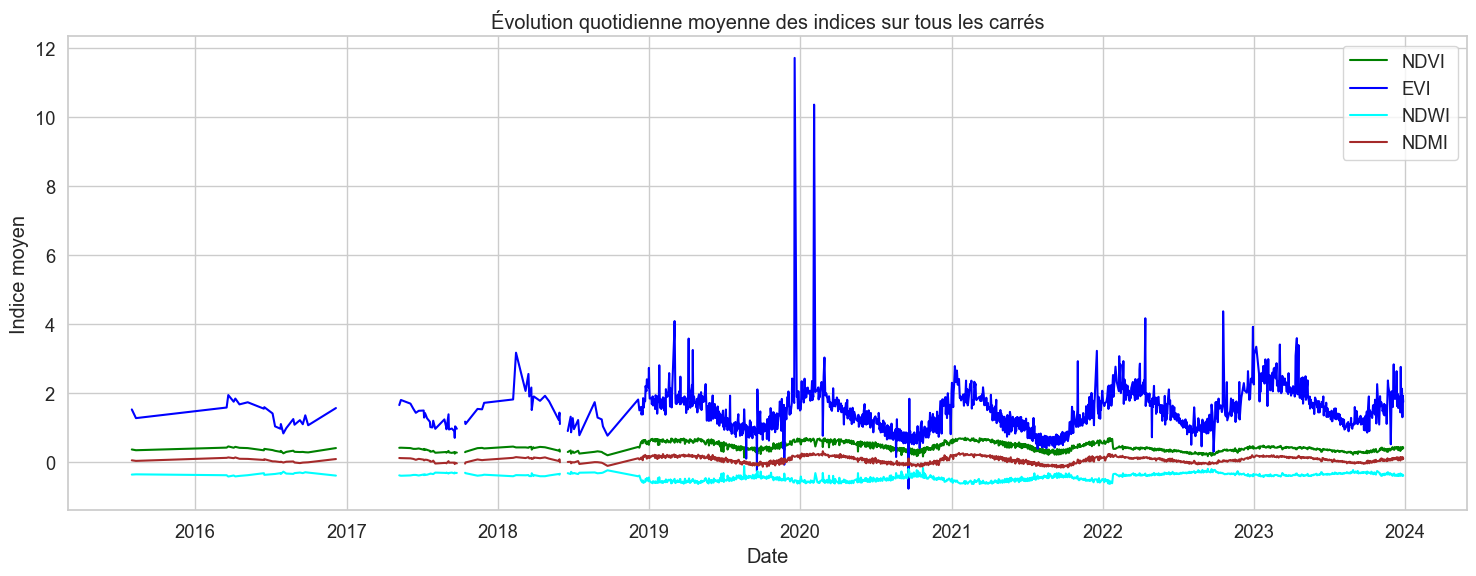

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assurer que la colonne datetime est bien au format datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Calculer la moyenne quotidienne de tous les indices sur tous les carrés
daily_mean = df.groupby('datetime')[['NDVI','EVI','NDWI','NDMI']].mean().reset_index()

# Paramètres de style
sns.set(style='whitegrid', palette='muted', context='notebook', font_scale=1.2)

# Tracer l'évolution
plt.figure(figsize=(15,6))
plt.plot(daily_mean['datetime'], daily_mean['NDVI'], label='NDVI', color='green')
plt.plot(daily_mean['datetime'], daily_mean['EVI'], label='EVI', color='blue')
plt.plot(daily_mean['datetime'], daily_mean['NDWI'], label='NDWI', color='cyan')
plt.plot(daily_mean['datetime'], daily_mean['NDMI'], label='NDMI', color='brown')

plt.xlabel('Date')
plt.ylabel('Indice moyen')
plt.title('Évolution quotidienne moyenne des indices sur tous les carrés')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
df.isna().sum()

datetime      0
NDVI        252
EVI         252
NDWI        252
NDMI        252
B2          252
B3          252
B4          252
B8          252
B11         252
dtype: int64

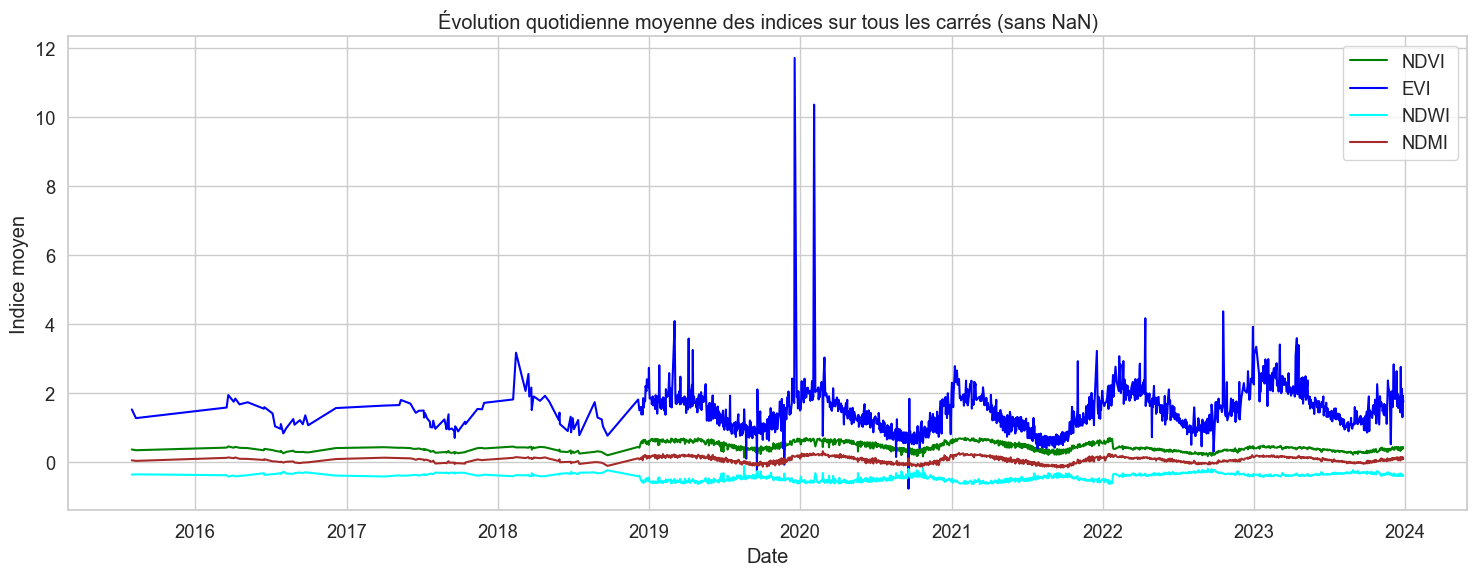

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assurer que la colonne datetime est bien au format datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Supprimer les lignes contenant des NaN dans les colonnes d'indices
df_clean = df.dropna(subset=['NDVI','EVI','NDWI','NDMI'])

# Calculer la moyenne quotidienne de tous les indices sur tous les carrés
daily_mean = df_clean.groupby('datetime')[['NDVI','EVI','NDWI','NDMI']].mean().reset_index()

# Paramètres de style
sns.set(style='whitegrid', palette='muted', context='notebook', font_scale=1.2)

# Tracer l'évolution
plt.figure(figsize=(15,6))
plt.plot(daily_mean['datetime'], daily_mean['NDVI'], label='NDVI', color='green')
plt.plot(daily_mean['datetime'], daily_mean['EVI'], label='EVI', color='blue')
plt.plot(daily_mean['datetime'], daily_mean['NDWI'], label='NDWI', color='cyan')
plt.plot(daily_mean['datetime'], daily_mean['NDMI'], label='NDMI', color='brown')

plt.xlabel('Date')
plt.ylabel('Indice moyen')
plt.title('Évolution quotidienne moyenne des indices sur tous les carrés (sans NaN)')
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
df_clean.isna().sum()

datetime    0
NDVI        0
EVI         0
NDWI        0
NDMI        0
B2          0
B3          0
B4          0
B8          0
B11         0
dtype: int64

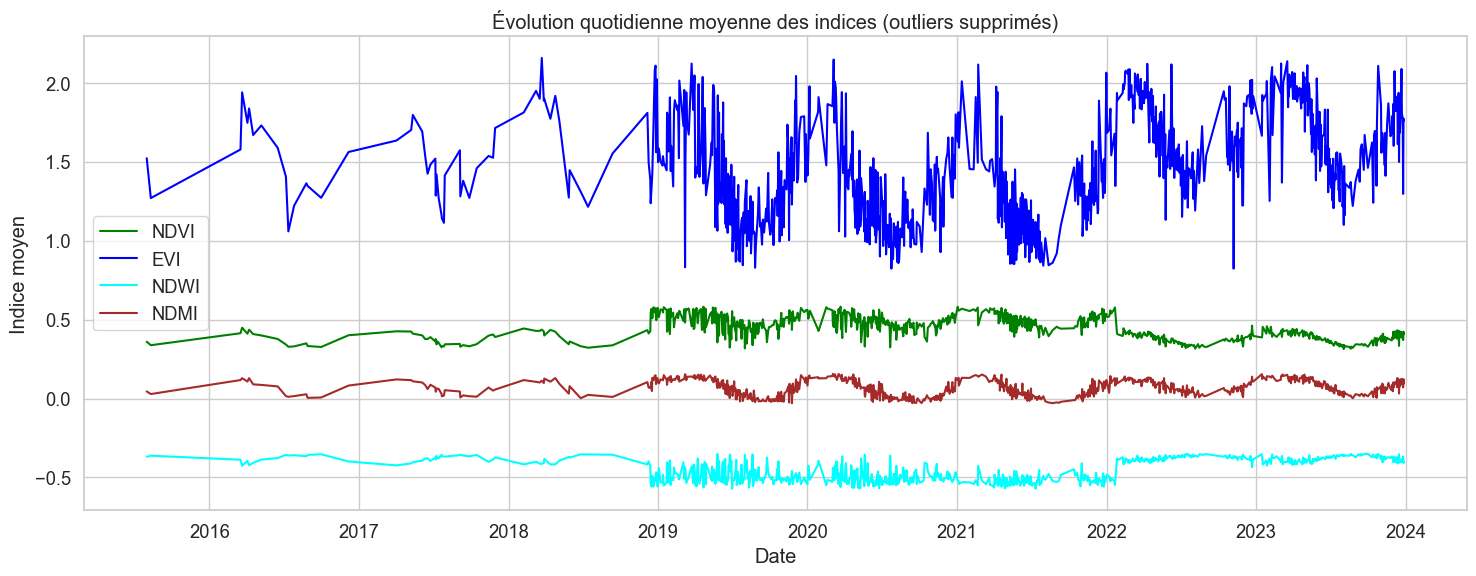

In [9]:
from scipy import stats

# Calculer le z-score pour chaque indice
z_scores = df_clean[['NDVI','EVI','NDWI','NDMI']].apply(stats.zscore)

# Définir un seuil pour détecter les outliers (ex: |z| > 3)
threshold = 1
mask = (z_scores.abs() < threshold).all(axis=1)

# Garder uniquement les valeurs non-outliers
df_filtered = df_clean[mask]

# Calculer la moyenne quotidienne
daily_mean = df_filtered.groupby('datetime')[['NDVI','EVI','NDWI','NDMI']].mean().reset_index()

# Tracer les courbes
sns.set(style='whitegrid', palette='muted', context='notebook', font_scale=1.2)

plt.figure(figsize=(15,6))
plt.plot(daily_mean['datetime'], daily_mean['NDVI'], label='NDVI', color='green')
plt.plot(daily_mean['datetime'], daily_mean['EVI'], label='EVI', color='blue')
plt.plot(daily_mean['datetime'], daily_mean['NDWI'], label='NDWI', color='cyan')
plt.plot(daily_mean['datetime'], daily_mean['NDMI'], label='NDMI', color='brown')

plt.xlabel('Date')
plt.ylabel('Indice moyen')
plt.title('Évolution quotidienne moyenne des indices (outliers supprimés)')
plt.legend()
plt.tight_layout()
plt.show()

Validation Set - RMSE: 0.0131, MAE: 0.0094, R²: 0.9869
Test Set - RMSE: 0.0131, MAE: 0.0094, R²: 0.9545


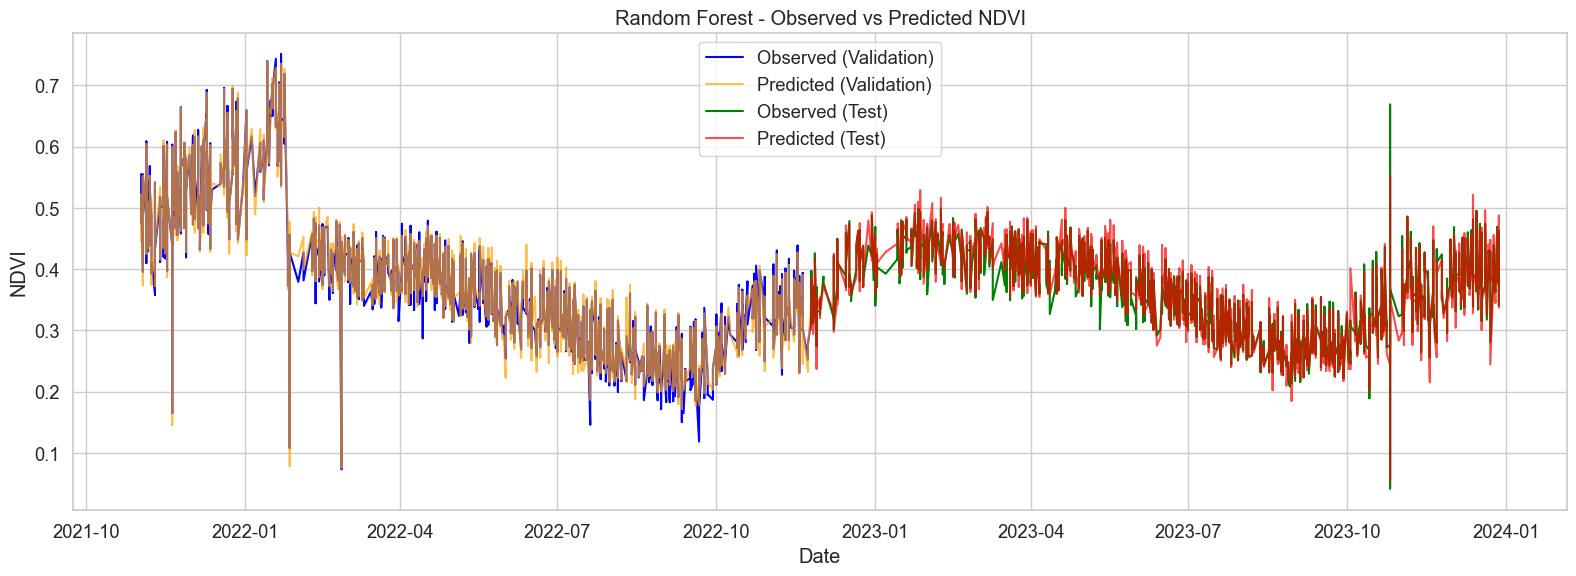

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Features et target
X_all = df_clean[['EVI', 'NDWI', 'NDMI']]
y_all = df_clean['NDVI']

# -------------------------
# 1️⃣ Séparer train / validation / test chronologiquement
# -------------------------
n = len(df_clean)
train_end = int(0.6 * n)
val_end = int(0.8 * n)

X_train, y_train = X_all.iloc[:train_end], y_all.iloc[:train_end]
X_val, y_val = X_all.iloc[train_end:val_end], y_all.iloc[train_end:val_end]
X_test, y_test = X_all.iloc[val_end:], y_all.iloc[val_end:]

# -------------------------
# 2️⃣ Entraîner le modèle sur les données d'entraînement
# -------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# -------------------------
# 3️⃣ Prédire sur validation et test
# -------------------------
y_pred_val = rf.predict(X_val)
y_pred_test = rf.predict(X_test)

# -------------------------
# 4️⃣ Évaluation
# -------------------------
def evaluate(y_true, y_pred, label=''):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    return rmse, mae, r2

evaluate(y_val, y_pred_val, label='Validation Set')
evaluate(y_test, y_pred_test, label='Test Set')

# -------------------------
# 5️⃣ Visualisation Observé vs Prévu
# -------------------------
sns.set(style='whitegrid', context='notebook', font_scale=1.2)

plt.figure(figsize=(16,6))

# Validation
plt.plot(df_clean['datetime'].iloc[train_end:val_end], y_val, label='Observed (Validation)', color='blue')
plt.plot(df_clean['datetime'].iloc[train_end:val_end], y_pred_val, label='Predicted (Validation)', color='orange', alpha=0.7)

# Test
plt.plot(df_clean['datetime'].iloc[val_end:], y_test, label='Observed (Test)', color='green')
plt.plot(df_clean['datetime'].iloc[val_end:], y_pred_test, label='Predicted (Test)', color='red', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('Random Forest - Observed vs Predicted NDVI')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
def print_errors(y_true, y_pred, label=''):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

print_errors(y_val, y_pred_val, label='Validation Set')
print_errors(y_test, y_pred_test, label='Test Set')

Validation Set - RMSE: 0.0131, MAE: 0.0094, R²: 0.9869
Test Set - RMSE: 0.0131, MAE: 0.0094, R²: 0.9545


Space cargo unlimited (new space) dvlpmt en gravité 0 pharmaceutique mildiou
Autre exemple : Michelin, formule secrète unique avec du caoutchou qui ne vient que des caoutchoutiers provenant d'Amérique Latine (monétisation de la solution)
Crucialité de ne pas perdre de coutchoutier (arbre a haute valeur ajoutée compliqué à faire pousser ?)
Y a til un lien entre l'apparition de ces nouvelles maladies et le changement climatique ?
(sous objectif, axe de poursuite --> Space Cargo unlimited (boite de pétri mildiou))
Essayer de démontrer que le spatial permet de développer du phytosanitaire 3x plus vite. 
Trouver des gens à interviewer (universitaires, californie ? institut de recherche type **INRIA**)
Quelles sont les analyses sur le développement de ces bactéries. Appparition de la bactérie ---> reliée à un taux d'hygro pression ect 
MIT à Boston utilisation de jumeaux numériques pour simmuler l'évolution de la maladie des arbres. 
Pourquoi pas imagine un système de surveillance des arbres avec des dirigeables IA pour les jumeaux numériques pour traiter de manière automatique les manoeuvres préventives aux problèmes. 
Chiffrer la perte pour monétiser notre solution. Soltuion de traitement duj greening en théorie, comment est-ce qu'on prédit l'occurence de cette maladie. Analyse probabilistique. Modèle prédictif de type actuaire. 
Fine tunner un LLM pourrait etre utile. 

Est-ce qu'il y a des chercheur qui s'interessent à cette maladie ? 
Variables climato-envrionnementales ? 

Regarder dans les données spatiales si il y pas des informations supplémentaires plus intéréssantes (données spectrales) 


Importance de détecter la maladie du dragon jaune le plus rapidement possible avec les données spatiales : 

sentinelle2 
landsat 
 et hyperspectraux : 
prisma
enmap
chime
planet
maxar

Comparer la signature spectrale entre un arbre sain et un arbre infecté. (Avant meme que les feuilles jaunissent), localiser les foyer de la maladie pour supprimer les arbres qui sont infectés. 


Creuser sur la partie académique agronomique de la bactérie. Trouver les corrélations entre les datas. Trouver des solutions inovantes pour mettre en place un, modèle (dirigeable piloté par GPS tres précis (geoflex) pour traiter un arbre).

🛰️ 1. Pourquoi le spatial peut détecter HLB avant l’œil humain ?
La maladie HLB provoque :
un stress hydrique précoce,
une baisse de chlorophylle,
des modifications de structure foliaire,
une signature thermique anormale,
un affaiblissement progressif du système vasculaire.
Ces signaux sont invisibles à l’œil humain…
mais parfaitement détectables depuis l’espace.
🔭 2. Les satellites capables de détecter HLB
A) Sentinel-2 (ESA) — le meilleur outil gratuit au monde
Résolution : 10 m
13 bandes spectrales (dont le red-edge très sensible au stress)
Permet :
✔ détection du stress végétal
✔ variation chlorophyllienne
✔ suivi temporel (toutes les 5 jours)
B) Landsat 8/9 (NASA/USGS)
Résolution : 30 m
Capable de détecter le stress hydrique + thermique
Idéal pour modéliser des zones entières de production d’agrumes
C) Satellites hyperspectraux (PRISMA, EnMAP, bientôt CHIME)
Hyper-précision
Analyse fine des pigments, de la structure foliaire, des signaux biochimiques
C’est ici que la maladie peut être détectée plusieurs semaines avant les symptômes visibles
D) Satellites commerciaux (Planet, Maxar)
Résolution de 50 cm à 30 cm
Permettent de repérer les arbres individuellement
🧬 3. Comment l’IA détecte la maladie ?
L’IA compare :
La signature spectrale d’un arbre sain
À celle d’un arbre infecté (HLB)
Sur une période de suivi (3–12 mois)
Les algorithmes identifient :
baisse du NDVI
distorsion du red-edge
anomalies thermiques nocturnes
variation de réflectance dans le court-infrarouge
stress hydrique localisé dans une parcelle
Avant même que les feuilles jaunissent.
C’est exactement ce que OB2S sait faire :
➡️ IA + satellites + jumeaux numériques de territoire.
🗺️ 4. Comment un État pourrait s’en servir ?
🔶 Alerte précoce nationale
Détection automatique des foyers suspects à l’échelle d’un pays.
🔶 Protection des zones stratégiques (ex : Corse, Espagne, Méditerranée)
Surveillance continue des vergers d’agrumes.
🔶 Economies massives
Éviter la destruction de millions d’arbres.
🔶 Souveraineté alimentaire
Protection des filières agrumes (citron, orange, bergamote, clémentine…).
🛠️ 5. Pipeline opérationnel OB2S (modèle de fonctionnement)
Étape	Ce que fait OB2S
1. Acquisition satellites	Sentinel-2, Planet, PRISMA
2. Prétraitement	Correction atmosphérique, découpage parcellaire
3. Extraction spectrale	NDVI, NDWI, Red-Edge, SWIR
4. IA prédictive	Modèle “HLB early stress detection”
5. Carte de risque	Probabilité HLB par parcelle / par arbre
6. Jumeau numérique agricole	Simulation impact & préconisations
Ce modèle est déjà utilisé pour
👉 les maladies de la vigne
👉 les stress hydriques
👉 les incendies
👉 les risques agricoles au Brésil
Il fonctionne parfaitement pour le Dragon Jaune.
🚁 6. Et si on combine satellites + drones ?
Alors on obtient :
cartographie satellite large
vérification locale par drone multispectral
intervention ciblée sur les arbres à risque
C’est le futur de l’agriculture intelligente souveraine.

In [12]:
path = r"Z:\Documents\School\PMI\data\orange_juice_futures_brazil_proxy.csv"

# Lire le CSV en DataFrame (pandas est déjà importé dans le notebook)
orange_df = pd.read_csv(path, parse_dates=['date'])

# Nettoyage / conversions
if 'date' in orange_df.columns:
    orange_df['date'] = pd.to_datetime(orange_df['date'], errors='coerce')
if 'price_per_lb' in orange_df.columns:
    orange_df['price_per_lb'] = pd.to_numeric(orange_df['price_per_lb'], errors='coerce')

# Trier par date et réindexer
orange_df = orange_df.sort_values('date').reset_index(drop=True)

# Afficher un aperçu
orange_df.head()

,date,price_per_lb
0,2015-08-03,128.149994
1,2015-08-04,131.949997
2,2015-08-05,131.750000
3,2015-08-06,131.449997
4,2015-08-07,132.449997


In [13]:
# Associer le prix du jus d'orange à chaque date du DataFrame df
# On suppose que df['datetime'] et orange_df['date'] sont des datetime compatibles

# Fusionner sur la date (left join pour garder toutes les lignes de df)
df_merged = df_clean.merge(orange_df[['date', 'price_per_lb']], left_on='datetime', right_on='date', how='left')

# Supprimer la colonne 'date' ajoutée par la fusion si inutile
df_merged = df_merged.drop(columns=['date'])



In [14]:
df_merged.isna().sum()

datetime           0
NDVI               0
EVI                0
NDWI               0
NDMI               0
B2                 0
B3                 0
B4                 0
B8                 0
B11                0
price_per_lb    3827
dtype: int64

In [15]:
# Supprimer les lignes contenant des NaN dans df_merged (remplace la variable)
df_merged.dropna(inplace=True)
df_merged = df_merged.reset_index(drop=True)

# Vérification rapide
print("Shape après suppression des NaN :", df_merged.shape)
print(df_merged.isna().sum())

Shape après suppression des NaN : (8068, 11)
datetime        0
NDVI            0
EVI             0
NDWI            0
NDMI            0
B2              0
B3              0
B4              0
B8              0
B11             0
price_per_lb    0
dtype: int64


In [16]:
# Calculer la corrélation (Pearson) entre chaque colonne numérique de df_merged et price_per_lb
# (pandas et numpy sont déjà importés dans le notebook)

# Sélectionner les colonnes numériques
numeric_cols = df_merged.select_dtypes(include=['number']).columns.tolist()

# Calculer la corrélation et retirer la ligne self-corr de price_per_lb
corr_series = df_merged[numeric_cols].corr(method='pearson')['price_per_lb'].drop('price_per_lb')

# Préparer un DataFrame lisible trié par corrélation absolue décroissante
corr_df = corr_series.reset_index().rename(columns={'index': 'feature', 'price_per_lb': 'pearson_corr'})
corr_df['abs_corr'] = corr_df['pearson_corr'].abs()
corr_df = corr_df.sort_values('abs_corr', ascending=False).reset_index(drop=True)

# Afficher les résultats
print(corr_df)



  feature  pearson_corr  abs_corr
0      B3      0.683595  0.683595
1      B2      0.680776  0.680776
2      B4      0.639254  0.639254
3      B8      0.584786  0.584786
4     B11      0.572866  0.572866
5    NDWI      0.568595  0.568595
6    NDVI     -0.450847  0.450847
7     EVI      0.114698  0.114698
8    NDMI     -0.069766  0.069766


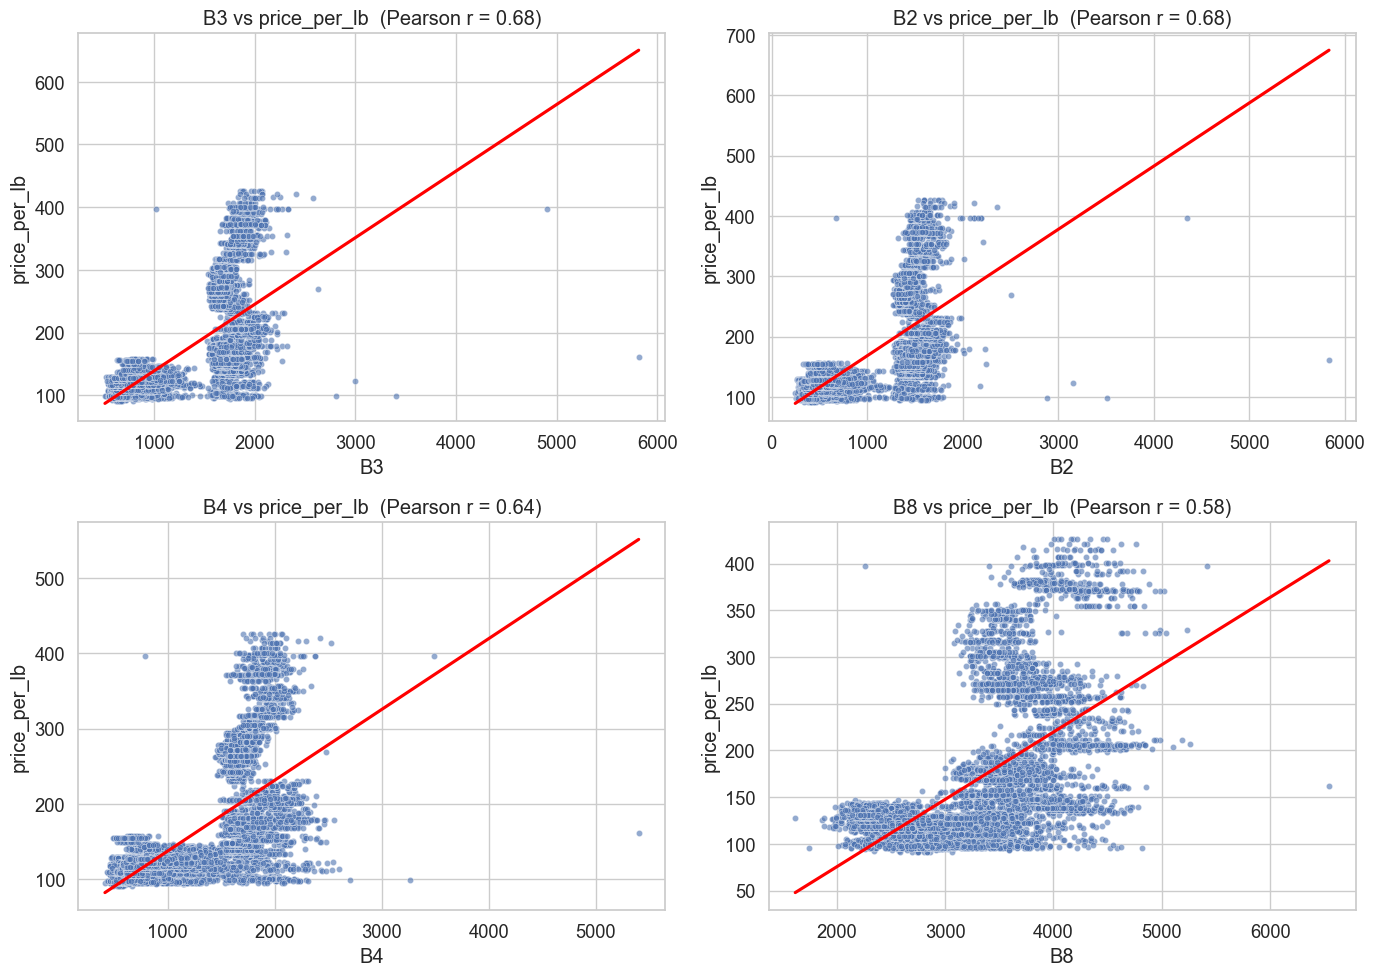

In [17]:
# Tracer price_per_lb en fonction des bandes spectrales B3, B2, B4, B8
# Utilise df_merged déjà présent dans le notebook (après nettoyage et fusion)

bands = ['B3', 'B2', 'B4', 'B8']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, band in enumerate(bands):
    ax = axes[i]
    # Scatter
    sns.scatterplot(x=band, y='price_per_lb', data=df_merged, ax=ax, s=20, alpha=0.6)
    # Régression linéaire pour visualiser la tendance
    try:
        sns.regplot(x=band, y='price_per_lb', data=df_merged, ax=ax, scatter=False, color='red', ci=None)
    except Exception:
        pass  # si regplot pose problème, on continue juste avec le scatter

    # Calculer et afficher la corrélation de Pearson
    if band in df_merged.columns and 'price_per_lb' in df_merged.columns:
        corr = df_merged[band].corr(df_merged['price_per_lb'])
        ax.set_title(f"{band} vs price_per_lb  (Pearson r = {corr:.2f})")
    else:
        ax.set_title(f"{band} vs price_per_lb")

    ax.set_xlabel(band)
    ax.set_ylabel('price_per_lb')

plt.tight_layout()
plt.show()

Chat, compte rendu de l'INRAE sur la maladie du dragon jaune 
Regarder aussi le document sur Byer france. 
Faire de l'archéologie et revenir au moment ou l'insecte pond, est-ce que la réponse spectrale est modifiée biologiquement. Beaucoup d'articles anxiogenes sur "psylles" le nom de l'insecte, comment se propage-t-il ? 
Peut-etre utiliser des pieges a ferhomone pour éclater le spylle.
Peut-etre balancer des psylles stériles pour garder les pyslles sans qu'ils le contaminent. 

Pour la semaine pro : état de l'art sur les solution agronomiques (chercher INRAE), chercher à leur offrir une solution pour qu'(il l'aient 6 mois avant).
 

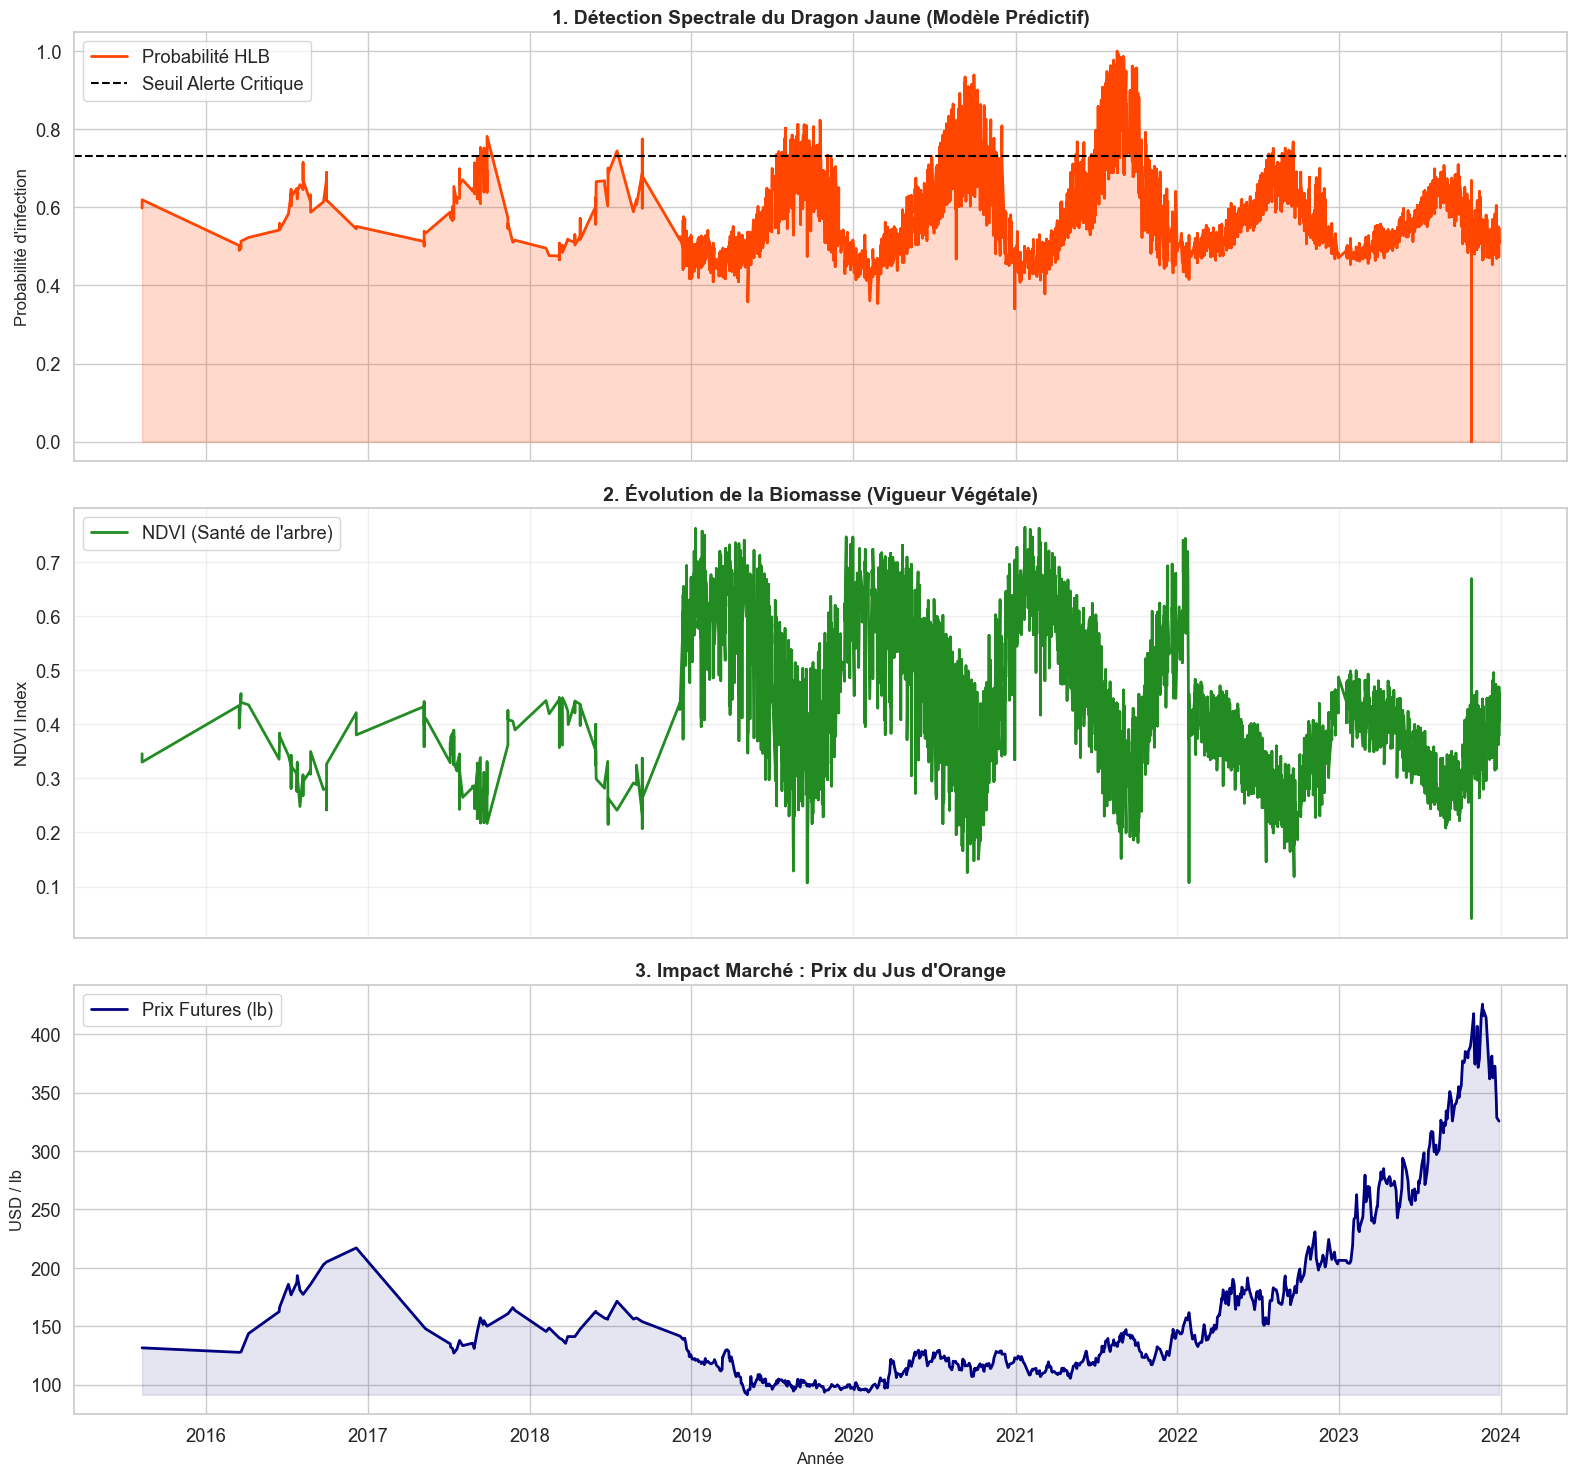

In [ ]:

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 15), sharex=True)


ax1.plot(df_merged['datetime'], df_merged['HLB_Risk_Score'], color='orangered', linewidth=2, label='Probabilité HLB')
ax1.fill_between(df_merged['datetime'], 0, df_merged['HLB_Risk_Score'], color='orangered', alpha=0.2)
ax1.axhline(y=df_merged['HLB_Risk_Score'].quantile(0.90), color='black', linestyle='--', label='Seuil Alerte Critique')
ax1.set_ylabel('Probabilité d\'infection', fontsize=12)
ax1.set_title('1. Détection Spectrale du Dragon Jaune (Modèle Prédictif)', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')


ax2.plot(df_merged['datetime'], df_merged['NDVI'], color='forestgreen', linewidth=2, label='NDVI (Santé de l\'arbre)')
ax2.set_ylabel('NDVI Index', fontsize=12)
ax2.set_title('2. Évolution de la Biomasse (Vigueur Végétale)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper left')


ax3.plot(df_merged['datetime'], df_merged['price_per_lb'], color='navy', linewidth=2, label='Prix Futures (lb)')
ax3.set_ylabel('USD / lb', fontsize=12)
ax3.set_xlabel('Année', fontsize=12)
ax3.set_title('3. Impact Marché : Prix du Jus d\'Orange', fontsize=14, fontweight='bold')
ax3.fill_between(df_merged['datetime'], df_merged['price_per_lb'].min(), df_merged['price_per_lb'], color='navy', alpha=0.1)
ax3.legend(loc='upper left')


plt.tight_layout()
plt.show()



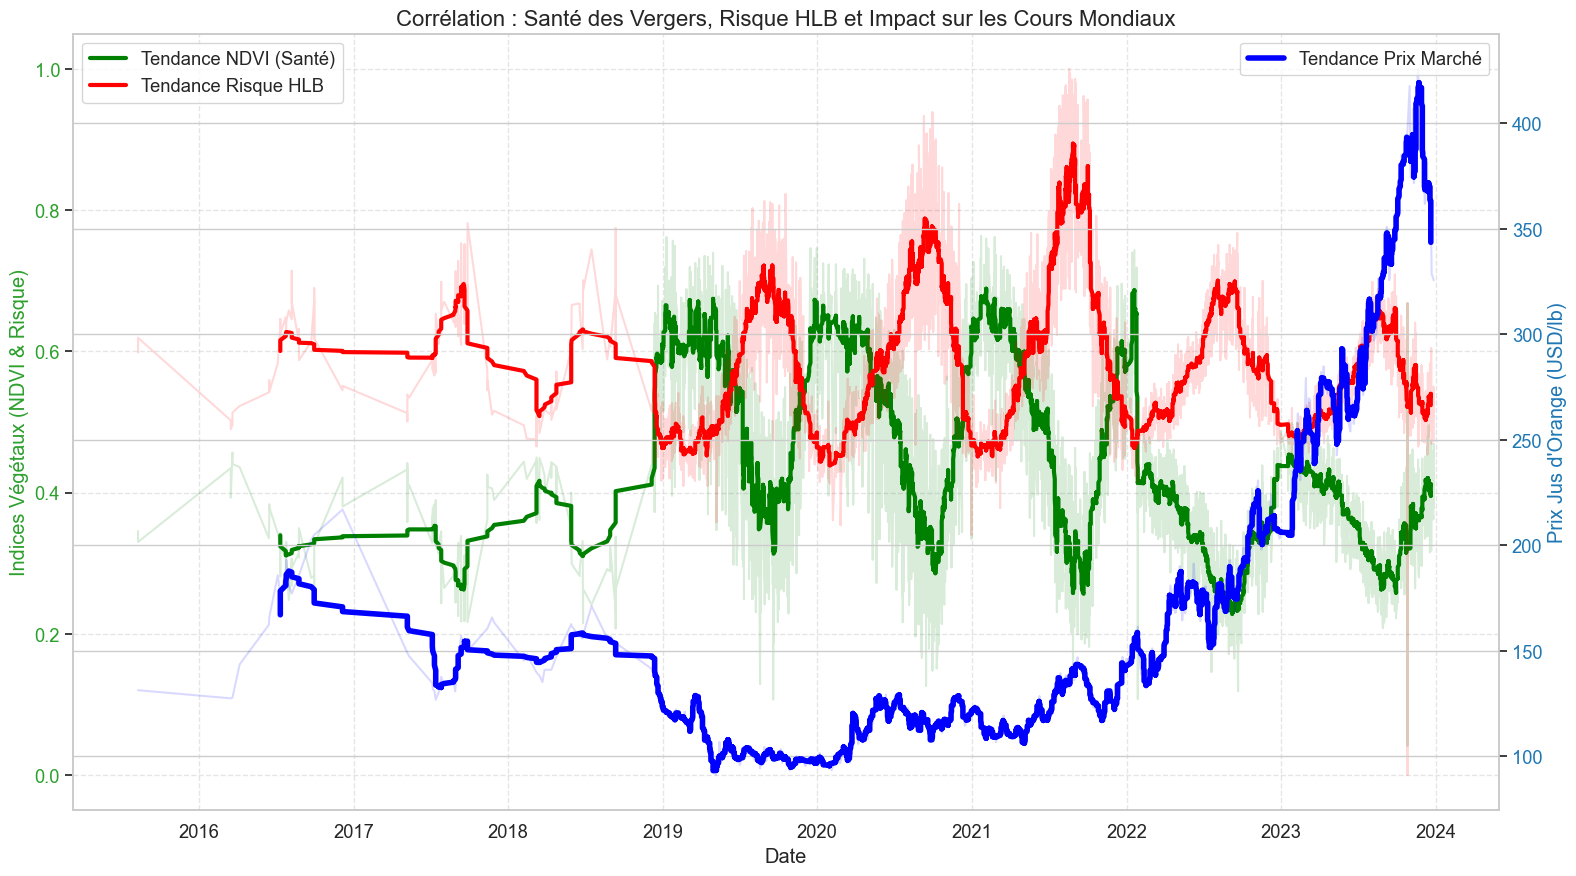

In [ ]:



import matplotlib.pyplot as plt

# Calcul des moyennes mobiles (fenêtre de 30 jours pour lisser les tendances)
df_merged['NDVI_trend'] = df_merged['NDVI'].rolling(window=30, center=True).mean()
df_merged['Risk_trend'] = df_merged['HLB_Risk_Score'].rolling(window=30, center=True).mean()
df_merged['Price_trend'] = df_merged['price_per_lb'].rolling(window=30, center=True).mean()

fig, ax1 = plt.subplots(figsize=(16, 9))


color1 = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Indices Végétaux (NDVI & Risque)', color=color1)
# Courbes NDVI
ax1.plot(df_merged['datetime'], df_merged['NDVI'], color='green', alpha=0.15)
ax1.plot(df_merged['datetime'], df_merged['NDVI_trend'], color='green', linewidth=3, label='Tendance NDVI (Santé)')
# Courbes Risque HLB
ax1.plot(df_merged['datetime'], df_merged['HLB_Risk_Score'], color='red', alpha=0.15)
ax1.plot(df_merged['datetime'], df_merged['Risk_trend'], color='red', linewidth=3, label='Tendance Risque HLB')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.legend(loc='upper left')


ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Prix Jus d\'Orange (USD/lb)', color=color2)
ax2.plot(df_merged['datetime'], df_merged['price_per_lb'], color='blue', alpha=0.15)
ax2.plot(df_merged['datetime'], df_merged['Price_trend'], color='blue', linewidth=4, label='Tendance Prix Marché')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.legend(loc='upper right')

plt.title('Corrélation : Santé des Vergers, Risque HLB et Impact sur les Cours Mondiaux', fontsize=16)
ax1.grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


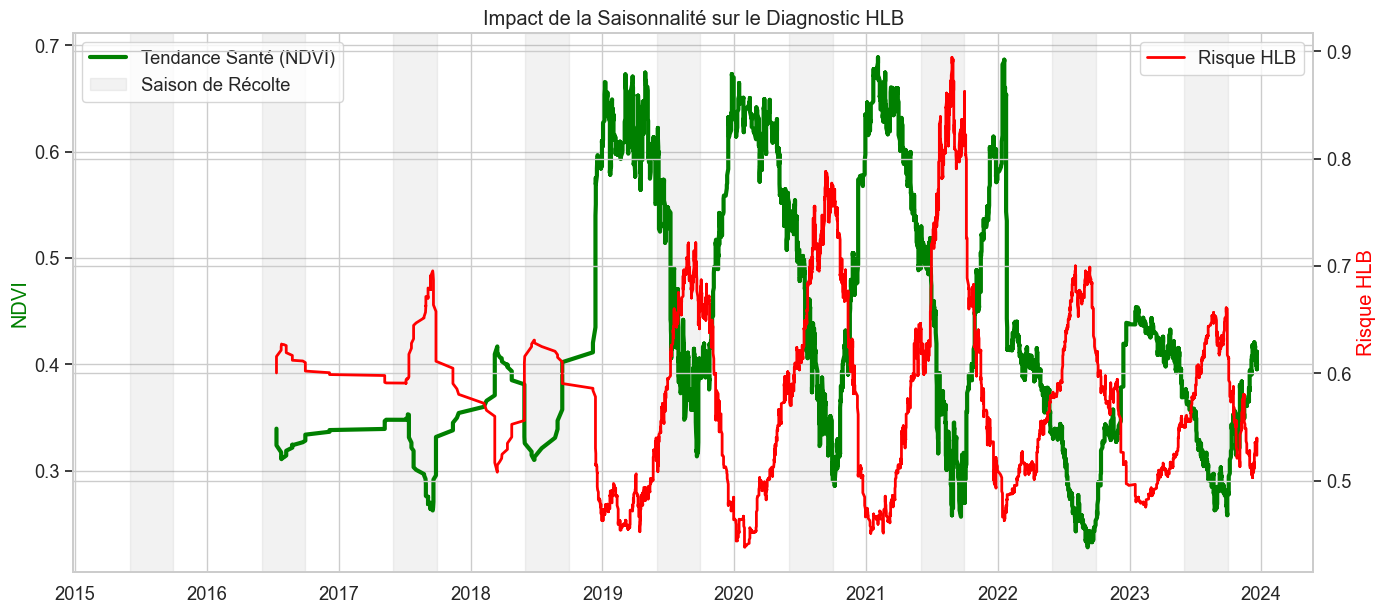

In [ ]:


df_merged['month'] = df_merged['datetime'].dt.month
df_merged['is_harvest'] = df_merged['month'].isin([6, 7, 8, 9])

fig, ax1 = plt.subplots(figsize=(16, 7))

# Courbe du NDVI
ax1.plot(df_merged['datetime'], df_merged['NDVI_trend'], color='green', linewidth=3, label='Tendance Santé (NDVI)')
ax1.set_ylabel('NDVI', color='green')

# Ajouter les zones de récolte
first_label = True
for year in df_merged['datetime'].dt.year.unique():
    start = pd.Timestamp(year=year, month=6, day=1)
    end = pd.Timestamp(year=year, month=9, day=30)
    ax1.axvspan(start, end, color='gray', alpha=0.1, label='Saison de Récolte' if first_label else "")
    first_label = False

# Ajouter le risque HLB pour comparaison
ax2 = ax1.twinx()
ax2.plot(df_merged['datetime'], df_merged['Risk_trend'], color='red', linewidth=2, label='Risque HLB')
ax2.set_ylabel('Risque HLB', color='red')

plt.title('Impact de la Saisonnalité sur le Diagnostic HLB')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()



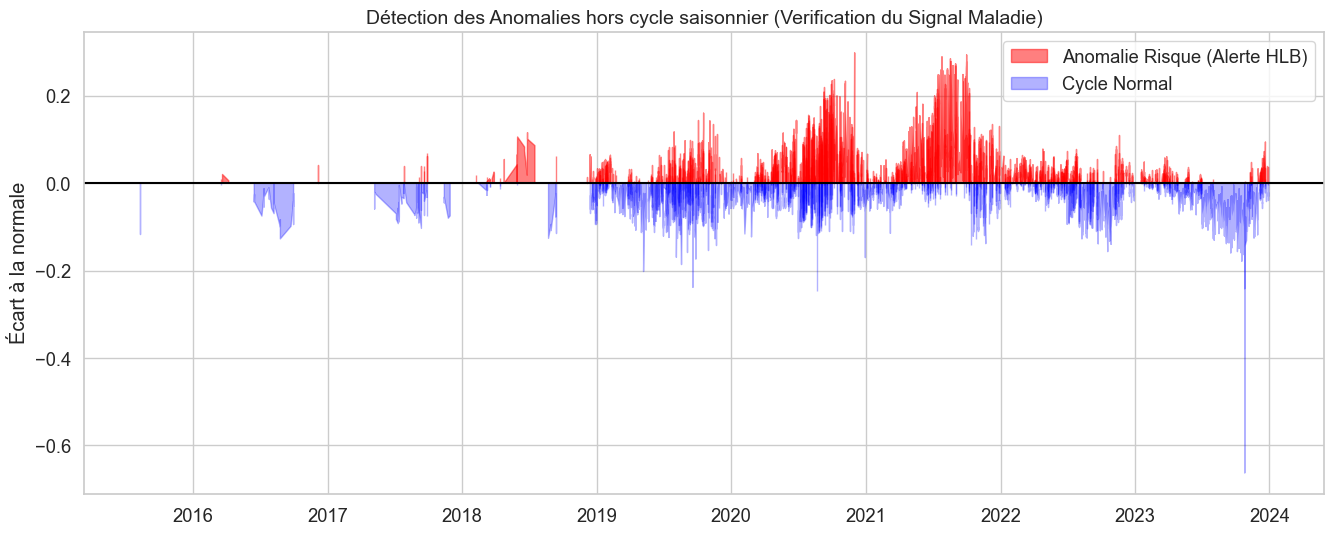

In [ ]:


# moyenne historique pour chaque mois 
monthly_avg = df_merged.groupby('month')['HLB_Risk_Score'].transform('mean')

# anomalie 
df_merged['HLB_Anomalie'] = df_merged['HLB_Risk_Score'] - monthly_avg

# 3. Graphique des Anomalies
plt.figure(figsize=(16, 6))
plt.fill_between(df_merged['datetime'], 0, df_merged['HLB_Anomalie'], 
                 where=(df_merged['HLB_Anomalie'] > 0), color='red', alpha=0.5, label='Anomalie Risque (Alerte HLB)')
plt.fill_between(df_merged['datetime'], 0, df_merged['HLB_Anomalie'], 
                 where=(df_merged['HLB_Anomalie'] <= 0), color='blue', alpha=0.3, label='Cycle Normal')

plt.axhline(y=0, color='black', linestyle='-')
plt.title('Détection des Anomalies hors cycle saisonnier (Verification du Signal Maladie)', fontsize=14)
plt.ylabel('Écart à la normale')
plt.legend()
plt.show()

